In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Startup Data/startup data.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [5]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

Data Cleaning

In [7]:
#Check Duplicate

duplicate_row = df[df.duplicated()]

print("Duplicate Row= ")

Duplicate Row= 


In [8]:
#Check unlogical value

# Check for negative values in the DataFrame
negative_values = df.select_dtypes(include=['number']).lt(0).any()

# Display columns with negative values
columns_with_negatives = negative_values[negative_values].index.tolist()

if columns_with_negatives:
    print(f"Columns with negative values: {columns_with_negatives}")
else:
    print("No negative values found in the DataFrame.")

Columns with negative values: ['longitude', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year']


In [9]:
#Drop Data with negative value except longitude

df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [10]:
#Change status data value to 0 or 1 and make it to int

df['status'] = df.status.map({'acquired':1, 'closed':0}).astype('int')

In [11]:
df['status'].head()

0    1
1    1
2    1
3    1
4    0
Name: status, dtype: int64

Handling Missing Value

In [12]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter out columns with no missing values
columns_with_missing_percentage = missing_percentage[missing_percentage > 0]

if not columns_with_missing_percentage.empty:
    print("Columns with missing values and their percentage:")
    for column, percentage in columns_with_missing_percentage.items():
        print(f"{column}: {percentage:.2f}%")
else:
    print("No missing values found in the DataFrame.")

Columns with missing values and their percentage:
Unnamed: 6: 53.45%
closed_at: 64.76%
age_first_milestone_year: 17.14%
age_last_milestone_year: 17.14%
state_code.1: 0.12%


In [13]:
#Unnamed: 6 is detail address that coming from combination among city, state_code, and zip_code

df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)

# Rename the column 'Unnamed: 6' to 'detailedAddress'
df.rename(columns={'Unnamed: 6': 'detailedAddress'}, inplace=True)

#Check Missing Value
print(df['detailedAddress'].isnull().sum())

0


Closed_at is the date for startup that has closed. Missing value means the startup hasn't closed.

In [14]:
# Handling missing closed_at with default value of 12/31/2013

df['closed_at'] = df['closed_at'].fillna(value="12/31/2013")

# Check Missing Value
print(df['closed_at'].isnull().sum())

0


In [15]:
# Handling missing value age_first_milestone_year & age_last_milestone_year

#Finding the coleration with value column milestone
# Filter rows where 'age_first_milestone_year' or 'age_last_milestone_year' are null
filtered_df = df[df['age_first_milestone_year'].isnull() | df['age_last_milestone_year'].isnull()]

# Print the 'milestones' column for these rows
print(filtered_df['milestones'])


12     0
15     0
24     0
34     0
37     0
      ..
885    0
903    0
904    0
906    0
912    0
Name: milestones, Length: 144, dtype: int64


Column with null value for age_first_milestone_year & age_last_milestone_year because the doesn't have milestone. So we can handle missing value by filling it with 0

In [16]:
# Fill null values in 'age_first_milestone_year' and 'age_last_milestone_year' with 0
df['age_first_milestone_year'].fillna(0, inplace=True)
df['age_last_milestone_year'].fillna(0, inplace=True)

# Check Missing Value
print(df['age_first_milestone_year'].isnull().sum())
print(df['age_last_milestone_year'].isnull().sum())

0
0


In [17]:
# Delete value colomn state_code.1 with missing value because it's only 0.12%

# Delete rows where 'state_code.1' has null values
df.dropna(subset=['state_code.1'], inplace=True)

# Check Missing Value
print(df['state_code.1'].isnull().sum())

0


In [18]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter out columns with no missing values
columns_with_missing_percentage = missing_percentage[missing_percentage > 0]

if not columns_with_missing_percentage.empty:
    print("Columns with missing values and their percentage:")
    for column, percentage in columns_with_missing_percentage.items():
        print(f"{column}: {percentage:.2f}%")
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                839 non-null    int64  
 1   state_code                839 non-null    object 
 2   latitude                  839 non-null    float64
 3   longitude                 839 non-null    float64
 4   zip_code                  839 non-null    object 
 5   id                        839 non-null    object 
 6   city                      839 non-null    object 
 7   detailedAddress           839 non-null    object 
 8   name                      839 non-null    object 
 9   labels                    839 non-null    int64  
 10  founded_at                839 non-null    object 
 11  closed_at                 839 non-null    object 
 12  first_funding_at          839 non-null    object 
 13  last_funding_at           839 non-null    object 
 14  age_first_fundi

Explanatory Data Analysis

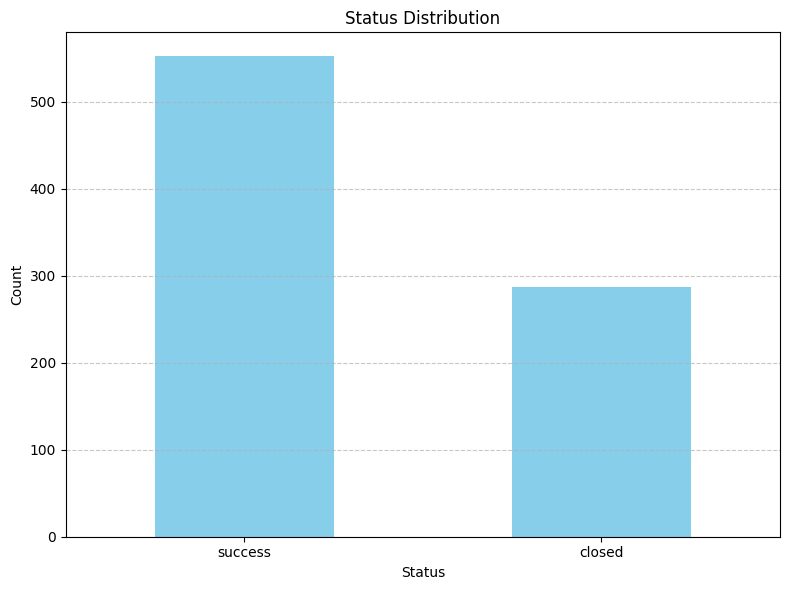

In [20]:
# Status Bar Chat
import pandas as pd
import matplotlib.pyplot as plt

status_counts = df['status'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['success', 'closed'], rotation = 0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

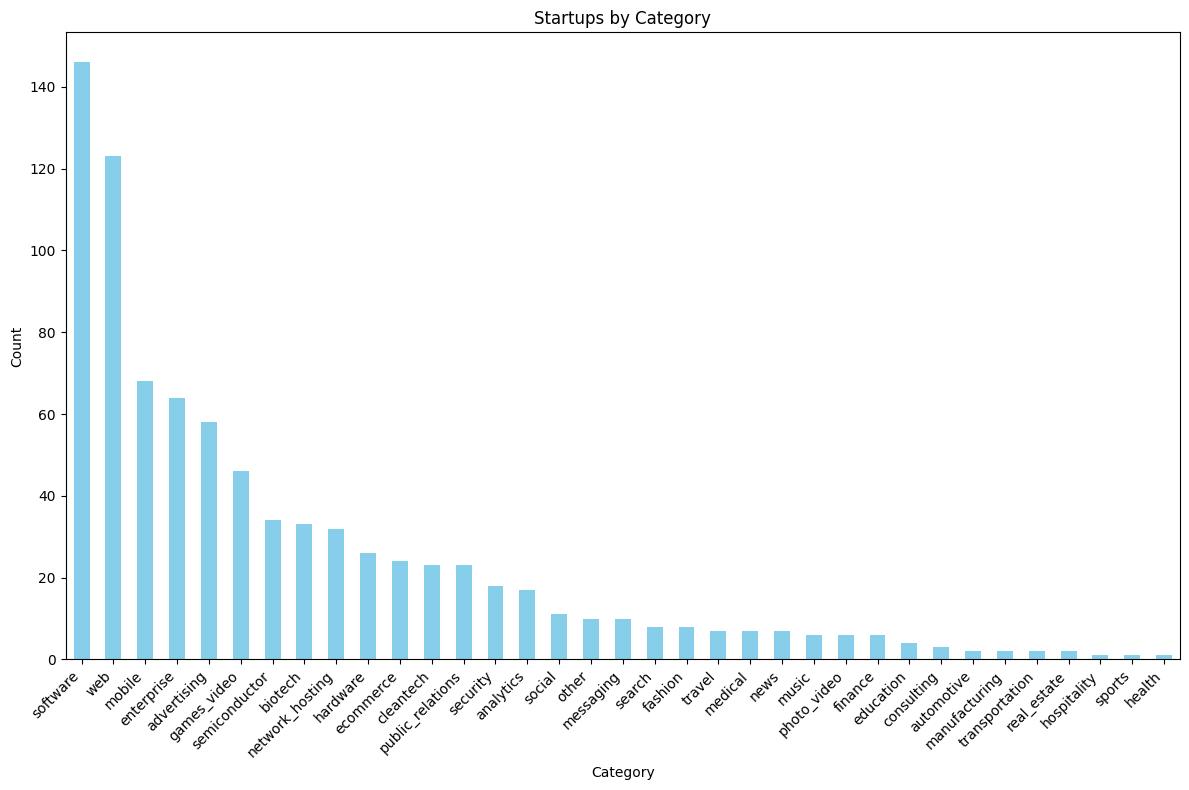

In [21]:
# Total startup based on category

category_counts = df['category_code'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Startups by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-22-25f9d67985cd>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


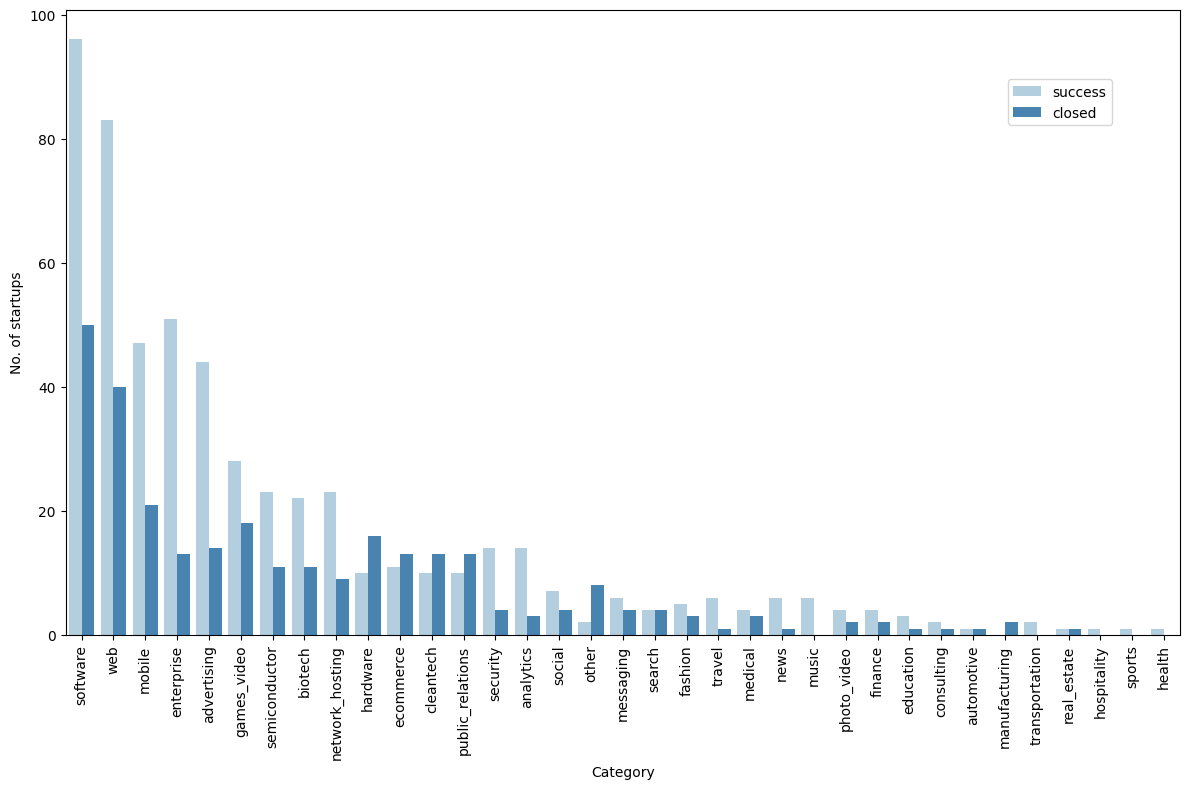

In [22]:
#Total startup based on startup Category and Status

import seaborn as sns

# Create a copy of the DataFrame for visualization purposes
df_copy = df.copy()

# Replace numerical values with labels for the copied DataFrame
df_copy['status'] = df_copy['status'].replace({1: 'success', 0: 'closed'})

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="category_code", hue="status", data=df_copy, palette="Blues",
                   order=df['category_code'].value_counts().index)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Category", ylabel="No. of startups")

# Adjust legend position
plt.legend(bbox_to_anchor=(0.945, 0.90))
plt.tight_layout()
plt.show()

In [23]:
# Startup Success Rate based on Category

# Filter data for successful startups
success_data = df[df['status'] == 1].groupby(['category_code']).agg({'status': 'count'}).reset_index()
success_data.columns = ['category_code', 'total_success']

# Filter data for closed startups
closed_data = df[df['status'] == 0].groupby(['category_code']).agg({'status': 'count'}).reset_index()
closed_data.columns = ['category_code', 'total_closed']

# Get total startup count for each category
total_startup_data = df.groupby(['category_code']).agg({'status': 'count'}).reset_index()
total_startup_data.columns = ['category_code', 'total_startup']

# Merge dataframes to calculate success rate
merged_data = success_data.merge(closed_data, on='category_code').merge(total_startup_data, on='category_code')

# Calculate success rate
merged_data['success_rate'] = round((merged_data['total_success'] / merged_data['total_startup']) * 100, 2)

# Sort by success rate
most_success_rate = merged_data.sort_values('success_rate', ascending=False)
most_success_rate


,category_code,total_success,total_closed,total_startup,success_rate
27,travel,6,1,7,85.71
17,news,6,1,7,85.71
1,analytics,14,3,17,82.35
8,enterprise,51,13,64,79.69
23,security,14,4,18,77.78
0,advertising,44,14,58,75.86
7,education,3,1,4,75.00
16,network_hosting,23,9,32,71.88
15,mobile,47,21,68,69.12
24,semiconductor,23,11,34,67.65


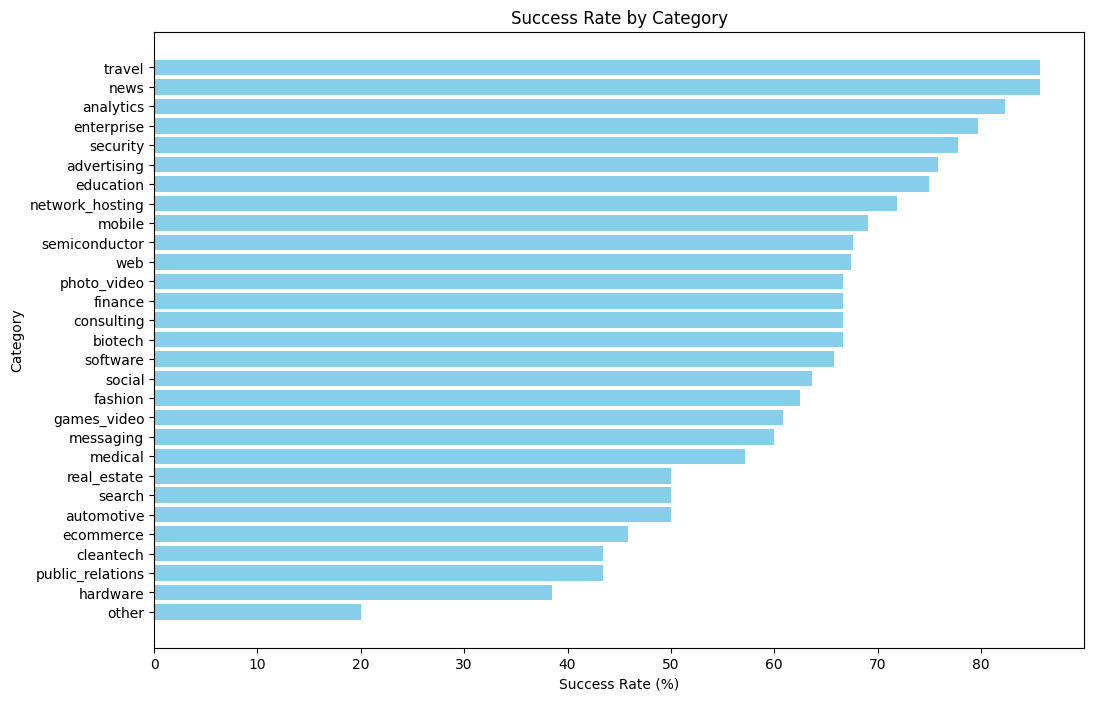

In [24]:
#Most Success Rate Visualitation

plt.figure(figsize=(12, 8))
plt.barh(most_success_rate['category_code'], most_success_rate['success_rate'], color='skyblue')
plt.xlabel('Success Rate (%)')
plt.ylabel('Category')
plt.title('Success Rate by Category')
plt.gca().invert_yaxis()  # Invert y-axis to display categories from top to bottom
plt.show()

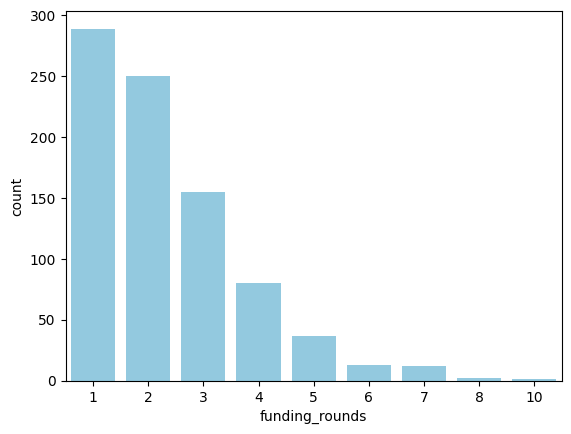

In [25]:
# Funding Round
sns.countplot(x='funding_rounds',data=df, color='skyblue')
plt.show()

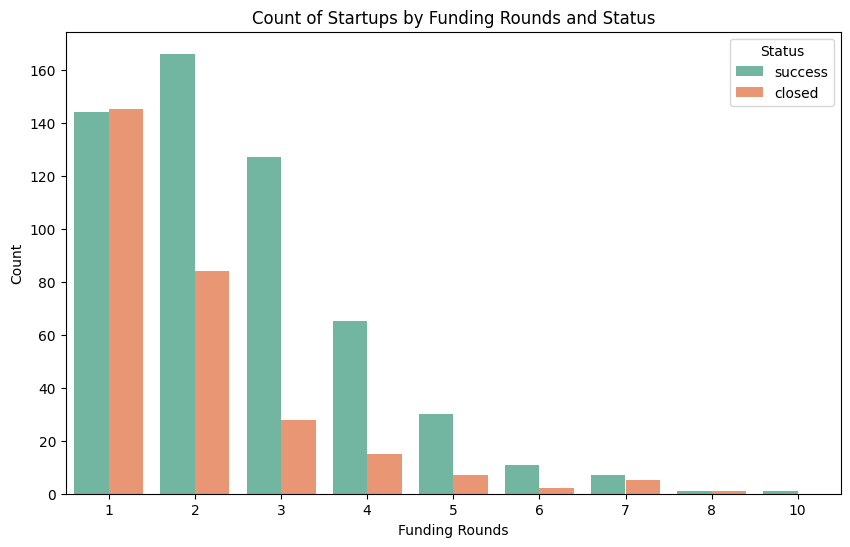

In [26]:
#Funding Round vs Status
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='funding_rounds', hue=df_copy['status'], data=df_copy, palette='Set2')
plt.xlabel('Funding Rounds')
plt.ylabel('Count')
plt.title('Count of Startups by Funding Rounds and Status')
plt.legend(title='Status')
plt.show()

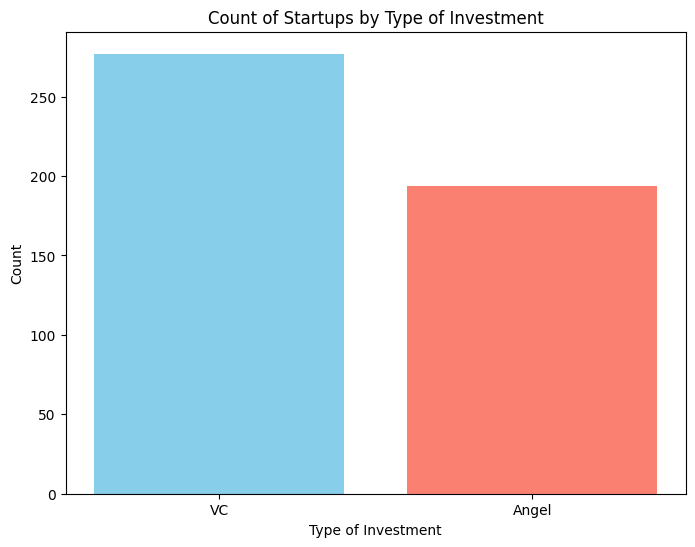

In [27]:
#Type of INvestment VC vs Angel

# Calculate the total number of startups with VC and angel investment
total_has_VC = (df['has_VC'] == 1).sum()
total_has_angel = (df['has_angel'] == 1).sum()

# Create the bar chart
labels = ['VC', 'Angel']
values = [total_has_VC, total_has_angel]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.xlabel('Type of Investment')
plt.ylabel('Count')
plt.title('Count of Startups by Type of Investment')
plt.show()

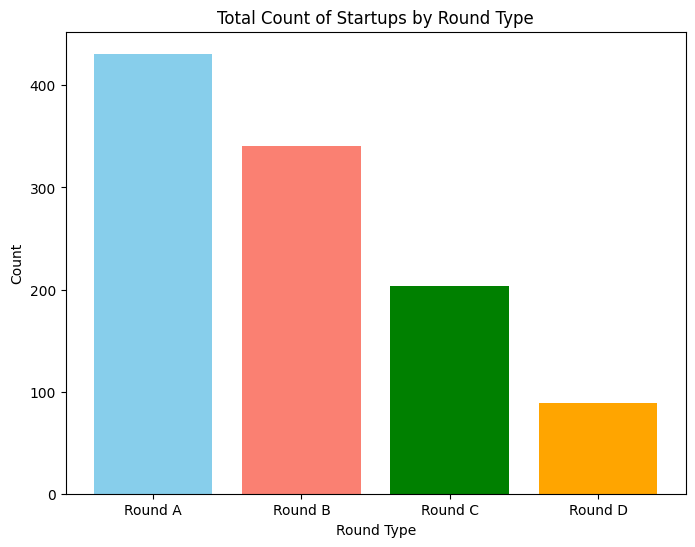

In [28]:
# Round Type

# Calculate the total count for each  round type
total_roundA = df['has_roundA'].sum()
total_roundB = df['has_roundB'].sum()
total_roundC = df['has_roundC'].sum()
total_roundD = df['has_roundD'].sum()

# Create labels and values for the bar chart
labels = ['Round A', 'Round B', 'Round C', 'Round D']
values = [total_roundA, total_roundB, total_roundC, total_roundD]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'salmon', 'green', 'orange'])
plt.xlabel('Round Type')
plt.ylabel('Count')
plt.title('Total Count of Startups by Round Type')
plt.show()


In [29]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'detailedAddress', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [30]:
#Average Funding by Category

average_funding_by_category= df.groupby('category_code')['funding_total_usd'].mean().reset_index()
average_funding_by_category['funding_total_usd'] = average_funding_by_category['funding_total_usd'] / 1e6

#Make in Million
average_funding_by_category.columns = ['category_code', 'Average_funding (in Million USD)']

#Sort
average_funding_by_category = average_funding_by_category.sort_values(by='Average_funding (in Million USD)', ascending=False)

average_funding_by_category

,category_code,Average_funding (in Million USD)
18,mobile,105.538582
32,transportation,63.852185
4,cleantech,56.534119
3,biotech,51.657267
13,health,41.000000
22,other,33.680923
28,semiconductor,32.210499
10,finance,32.196451
12,hardware,28.989187
2,automotive,26.000000


In [ ]:
# average_funding_by_category

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='category_code', y='Average_funding (in Million USD)', data=average_funding_by_category, palette='Blues_d', dodge=False)

# Add title and labels
plt.title('Average Funding by Category (in millions USD)')
plt.xlabel('Category Code')
plt.ylabel('Average Funding (Million USD)')

plt.xticks(rotation=45)

# Show plot
plt.show()

<ipython-input-31-11f587adf881>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_code', y='Average_funding (in Million USD)', data=average_funding_by_category, palette='Blues_d', dodge=False)


In [ ]:
#Is 500 Company vs status

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='is_top500', hue=df_copy['status'], data=df_copy, palette='Set2')
plt.xlabel('Top 500 Companies')
plt.ylabel('Count')
plt.title('Count of Startups by is Top 500 Companies and Status')
plt.legend(title='Status')
plt.show()

Correlation

In [ ]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']

# Calculate the correlation matrix
corr = df[features].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

Feature Engineering

In [ ]:
#Startup Age
import numpy as np

#Change to datetime
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['founded_at'] = pd.to_datetime(df['founded_at'])

df["age"] = df["closed_at"]-df["founded_at"]
df["age"]=round(df.age/np.timedelta64(1,'Y'))

In [ ]:
#Drop inlogical value
df = df.drop(df[df['age'] < 0].index)
df = df.drop(df[df['age_first_funding_year'] < 0].index)
df = df.drop(df[df['age_last_funding_year'] < 0].index)
df = df.drop(df[df['age_first_milestone_year'] < 0].index)
df = df.drop(df[df['age_last_milestone_year'] < 0].index)

In [ ]:
#Startup age by Category


average_age_by_category= df.groupby('category_code')['age'].mean().reset_index()

#Make in Million
average_age_by_category.columns = ['category_code', 'Average_age']

#Sort
average_age_by_category = average_age_by_category.sort_values(by='Average_age', ascending=False)

average_age_by_category

In [ ]:
# average_age_by_category

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='category_code', y='Average_age', data=average_age_by_category, palette='Blues_d', dodge=False)

# Add title and labels
plt.title('Average Age by Category')
plt.xlabel('Category Code')
plt.ylabel('Average Age')

plt.xticks(rotation=45)

# Show plot
plt.show()

In [ ]:
# Startup Success Rate based on age

# Filter data for successful startups
age_success_data = df[df['status'] == 1].groupby(['age']).agg({'status': 'count'}).reset_index()
age_success_data.columns = ['age', 'total_success']

# Filter data for closed startups
closed_data = df[df['status'] == 0].groupby(['age']).agg({'status': 'count'}).reset_index()
closed_data.columns = ['age', 'total_closed']

# Get total startup count for each category
total_startup_data = df.groupby(['age']).agg({'status': 'count'}).reset_index()
total_startup_data.columns = ['age', 'total_startup']

# Merge dataframes to calculate success rate
merged_data = age_success_data.merge(closed_data, on='age').merge(total_startup_data, on='age')

# Calculate success rate
merged_data['success_rate'] = round((merged_data['total_success'] / merged_data['total_startup']) * 100, 2)

# Sort by success rate
age_most_success_rate = merged_data.sort_values('success_rate', ascending=False)

age_most_success_rate


In [ ]:
#Most Success Rate Visualitation based on age

plt.figure(figsize=(12, 8))
plt.barh(age_most_success_rate['age'], age_most_success_rate['success_rate'], color='skyblue')
plt.xlabel('Success Rate (%)')
plt.ylabel('Age')
plt.title('Success Rate by Age')
plt.gca().invert_yaxis()  # Invert y-axis to display ages from top to bottom
plt.show()

In [ ]:
#Is Located in big_city

df['is_in_BigCity'] = np.where((df['is_CA'] == 1) | (df['is_NY'] == 1) | (df['is_MA'] == 1) | (df['is_TX'] == 1) | (df['state_code'] == 'WA'), 1, 0)

In [ ]:
#Is in Big City

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=df.is_in_BigCity, hue=df_copy['status'], data=df_copy, palette= ['red', 'green'])
plt.xlabel('In Big City')
plt.ylabel('Count')
plt.title('Count of Startups by is in big city and Status')
plt.legend(title='Status')
plt.show()

In [ ]:
#Has_Seed

df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df['has_Seed'].value_counts()

In [ ]:
# Round Type

# Calculate the total count for each  round type
total_seed = df['has_Seed'].sum()
total_roundA = df['has_roundA'].sum()
total_roundB = df['has_roundB'].sum()
total_roundC = df['has_roundC'].sum()
total_roundD = df['has_roundD'].sum()


# Create labels and values for the bar chart
labels = ['Seed', 'Round A', 'Round B', 'Round C', 'Round D']
values = [total_seed, total_roundA, total_roundB, total_roundC, total_roundD]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'salmon', 'green', 'orange', 'red'])
plt.xlabel('Round Type')
plt.ylabel('Count')
plt.title('Total Count of Startups by Round Type')
plt.show()


In [ ]:
# Define the trend industry based on the provided list
trend = ['software', 'web', 'mobile','enterprise', 'advertising']

# Create a new column 'is_trend_industry'
df['is_trend_industry'] = np.where(df['category_code'].isin(trend), 1, 0)

In [ ]:
#is_trend_industry

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=df.is_trend_industry, hue=df_copy['status'], data=df_copy, palette= 'Set2')
plt.xlabel('Trend Industry')
plt.ylabel('Count')
plt.title('Count of Startups by is trend industry and Status')
plt.legend(title='Status')
plt.show()

In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
df.info()

In [ ]:
columns_to_drop = [
    'Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code',
    'id', 'city', 'detailedAddress', 'name', 'labels',
    'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'object_id', 'has_RoundABCD', 'has_Investor'
]

df = df.drop(columns=columns_to_drop)

In [49]:
df.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status',
       'age', 'is_in_BigCity', 'has_Seed', 'is_trend_industry'],
      dtype='object')

**Modeling**

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop('status', axis = 1)

y = df['status']

In [51]:
#Splitting the data into Train and Test
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2,
                                                random_state = 52)

Random Forest

Training Accuracy: 1.0
Testing Accuracy: 0.8392857142857143

Accuracy Score: 0.8392857142857143


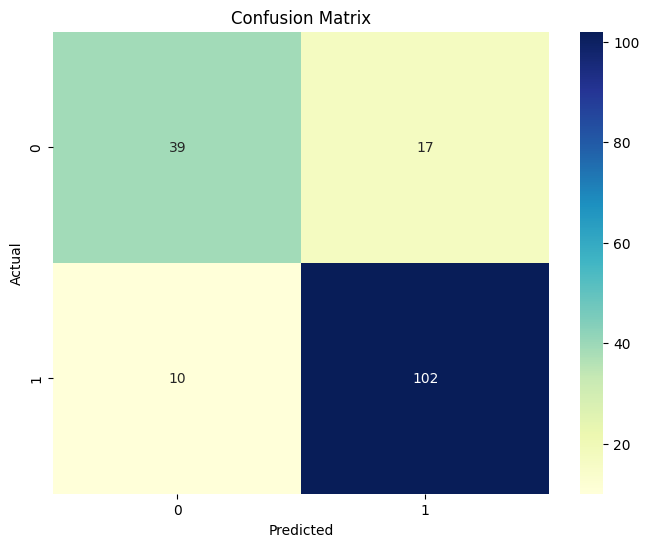

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.74        56
           1       0.86      0.91      0.88       112

    accuracy                           0.84       168
   macro avg       0.83      0.80      0.81       168
weighted avg       0.84      0.84      0.84       168

------------------------------------------
ROC AUC Score: 0.8035714285714285
Precision-Recall AUC Score: 0.9136904761904762


In [52]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model on training data
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Print accuracy scores
print("Training Accuracy:", rf.score(X_train, y_train))
print("Testing Accuracy:", rf.score(X_test, y_test))

# Calculate and print accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy Score:", accuracy_rf)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
cr = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(cr)

print("------------------------------------------")

# Calculate ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC Score:", roc_auc)

# Calculate Precision-Recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_auc = auc(recall, precision)
print("Precision-Recall AUC Score:", Precision_Recall_auc)


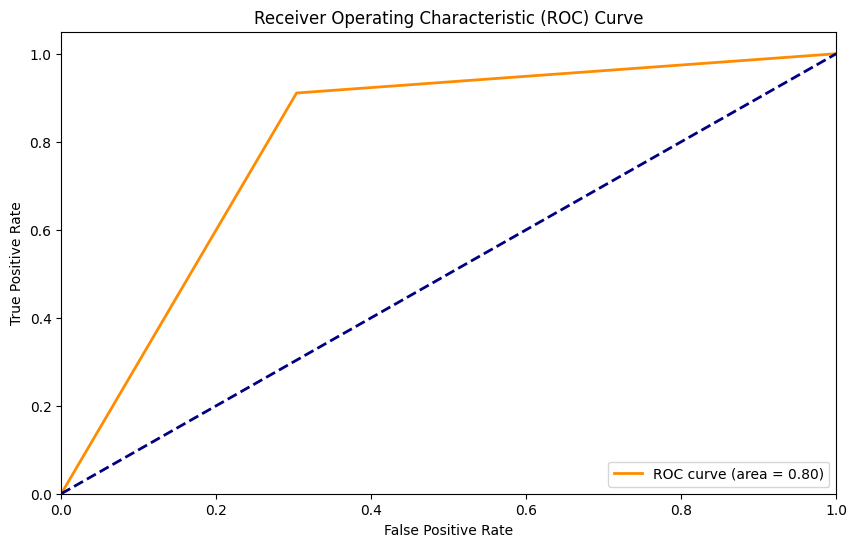

In [53]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

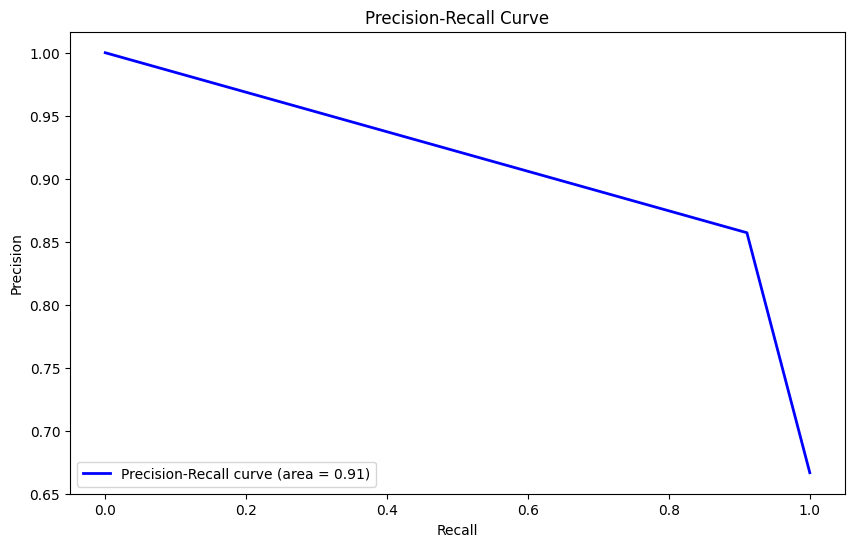

In [54]:
# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {Precision_Recall_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

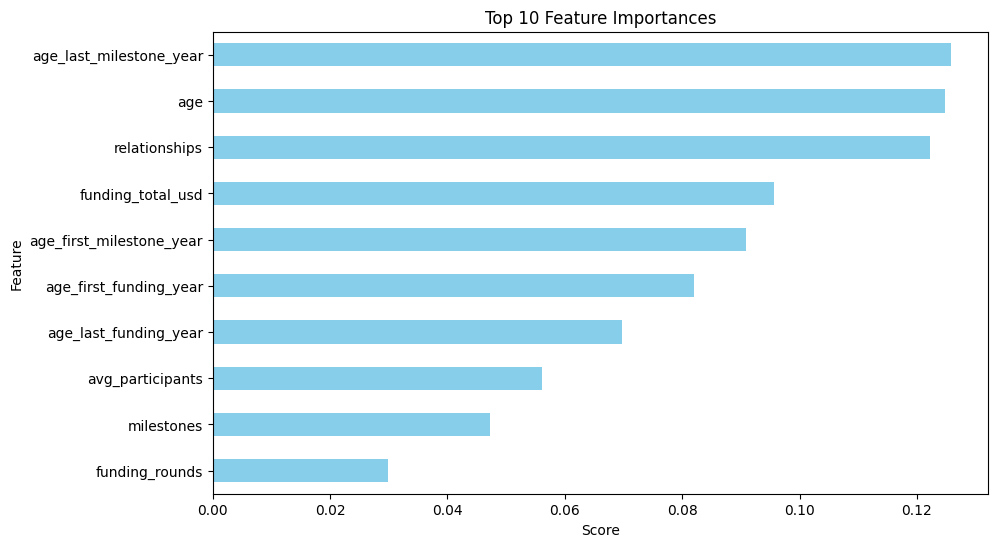

In [55]:
# Get feature importances from the trained RandomForestClassifier
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Select the top 10 features with the highest importance scores
top_feat_importances = feat_importances.nlargest(10)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
ax = top_feat_importances.plot(kind='barh', color='skyblue')
ax.invert_yaxis()
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()


XGBoost

Training Accuracy: 1.0
Testing Accuracy: 0.8452380952380952

Accuracy Score: 0.8452380952380952


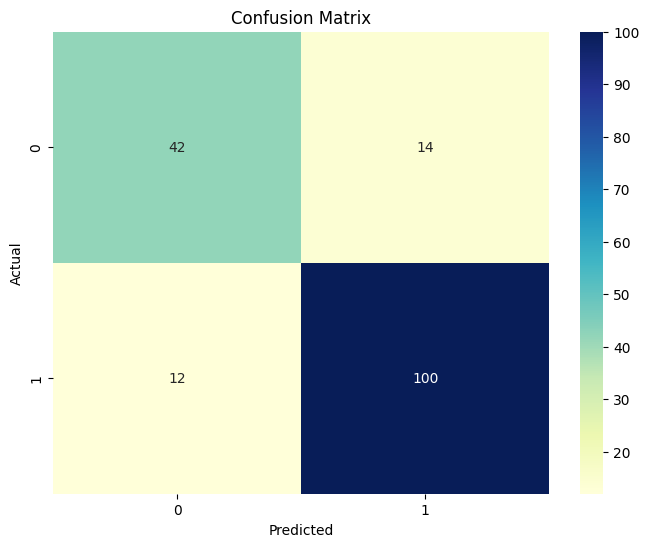

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        56
           1       0.88      0.89      0.88       112

    accuracy                           0.85       168
   macro avg       0.83      0.82      0.82       168
weighted avg       0.84      0.85      0.84       168

------------------------------------------
ROC AUC Score: 0.8214285714285715
Precision-Recall AUC Score: 0.9207393483709273


In [56]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBClassifier
xgb = XGBClassifier()

# Fit the model on training data
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Print accuracy scores
print("Training Accuracy:", xgb.score(X_train, y_train))
print("Testing Accuracy:", xgb.score(X_test, y_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
print("\nAccuracy Score:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
cr = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(cr)

print("------------------------------------------")

# Calculate ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC Score:", roc_auc)

# Calculate Precision-Recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
Precision_Recall_auc = auc(recall, precision)
print("Precision-Recall AUC Score:", Precision_Recall_auc)


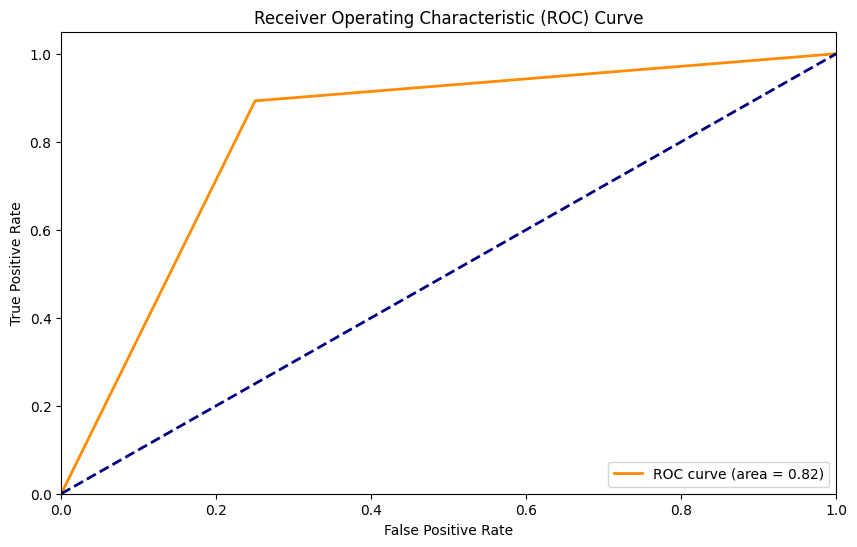

In [57]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

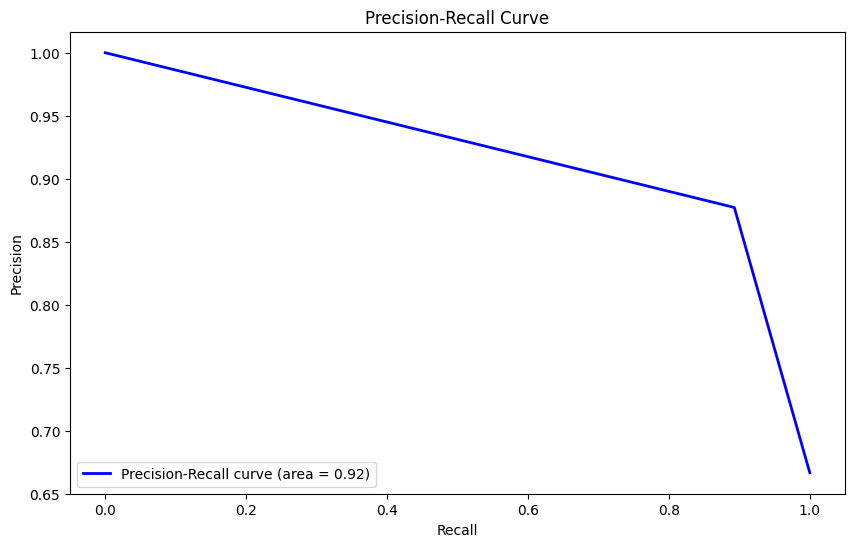

In [58]:
# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {Precision_Recall_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

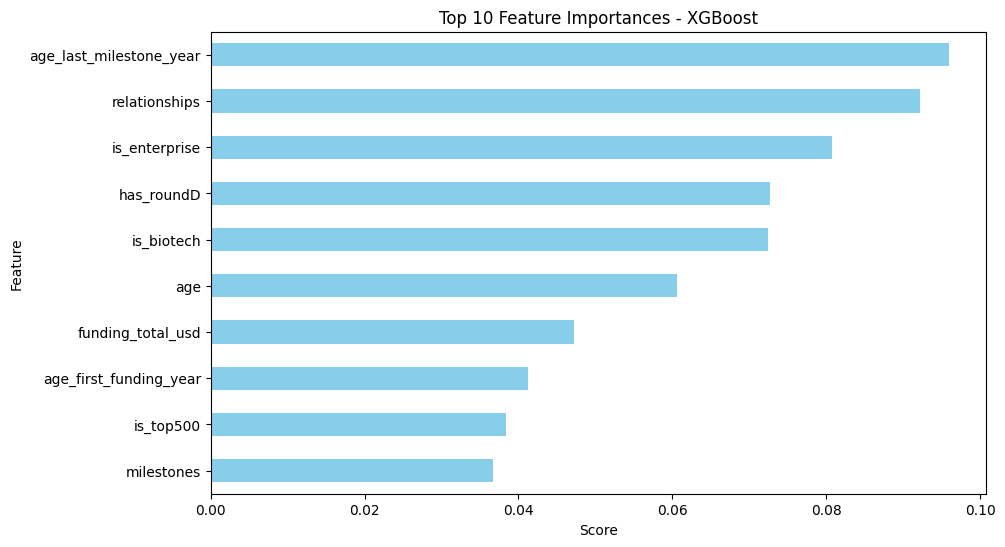

In [59]:
# Get feature importances from the trained XGBClassifier
feat_importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns)

# Select the top 10 features with the highest importance scores
top_feat_importances_xgb = feat_importances_xgb.nlargest(10)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
ax = top_feat_importances_xgb.plot(kind='barh', color='skyblue')
ax.invert_yaxis()
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - XGBoost')
plt.show()


LGBM

[LightGBM] [Info] Number of positive: 439, number of negative: 230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 669, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.656203 -> initscore=0.646420
[LightGBM] [Info] Start training from score 0.646420
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


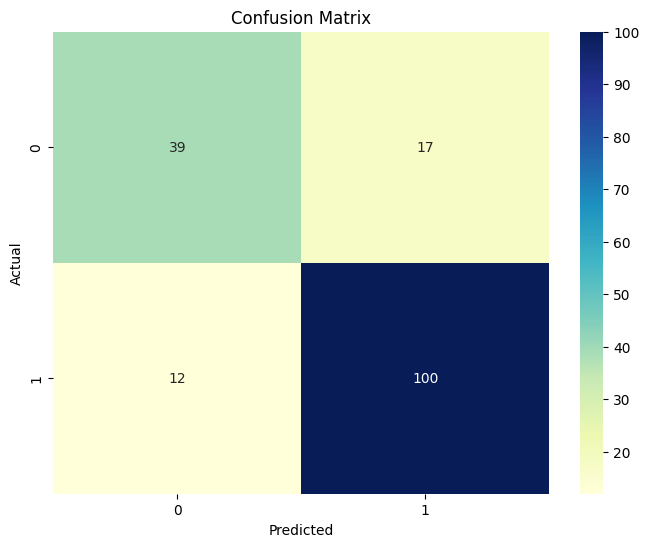

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        56
           1       0.85      0.89      0.87       112

    accuracy                           0.83       168
   macro avg       0.81      0.79      0.80       168
weighted avg       0.82      0.83      0.83       168

------------------------------------------
ROC AUC Score: 0.794642857142857
Precision-Recall AUC Score: 0.9094932844932845


In [60]:
# Import necessary libraries
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Initialize the LGBMClassifier
lgbm = LGBMClassifier()

# Fit the model on training data
lgbm.fit(X_train, y_train)

# Predict on test data
y_pred_lgbm = lgbm.predict(X_test)

# Print accuracy scores
print("Training Accuracy:", lgbm.score(X_train, y_train))
print("Testing Accuracy:", lgbm.score(X_test, y_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred_lgbm)
print("\nAccuracy Score:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
cr = classification_report(y_test, y_pred_lgbm)
print("Classification Report:")
print(cr)

print("------------------------------------------")

# Calculate ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_lgbm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC Score:", roc_auc)

# Calculate Precision-Recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lgbm)
f1 = f1_score(y_test, y_pred_lgbm)
Precision_Recall_auc = auc(recall, precision)
print("Precision-Recall AUC Score:", Precision_Recall_auc)

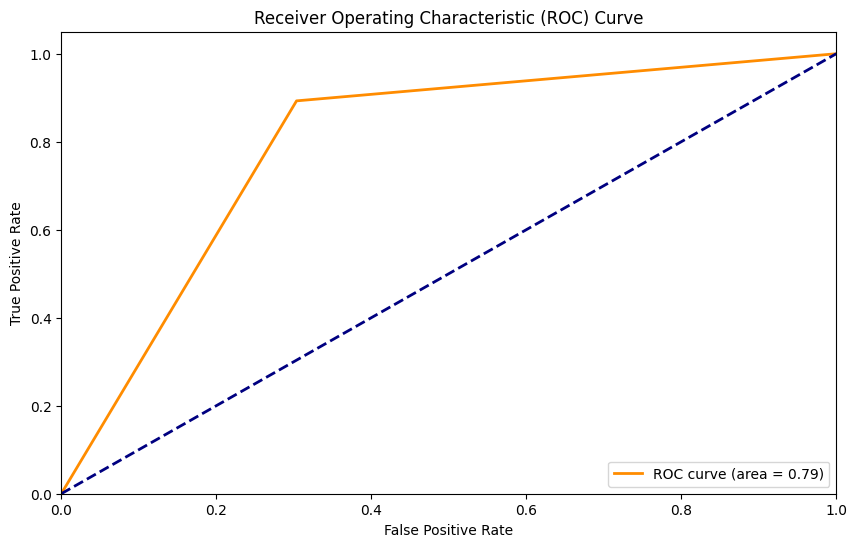

In [61]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

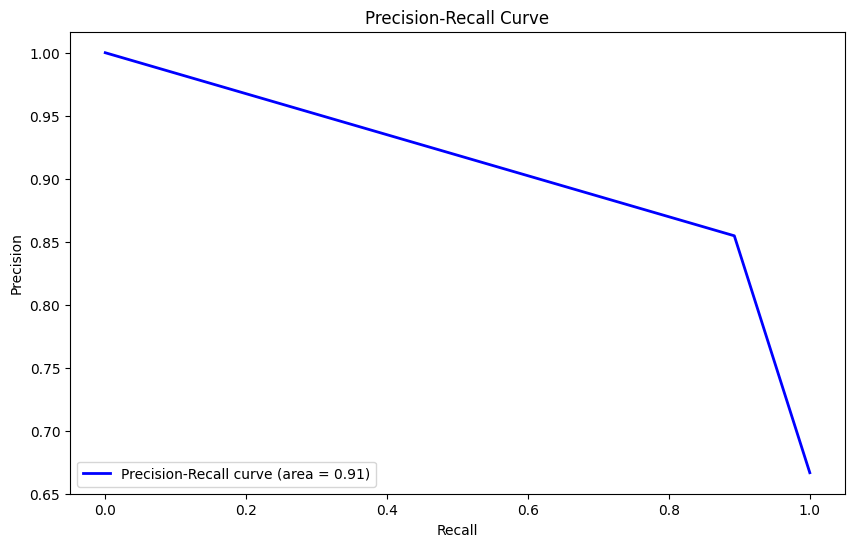

In [62]:
# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {Precision_Recall_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

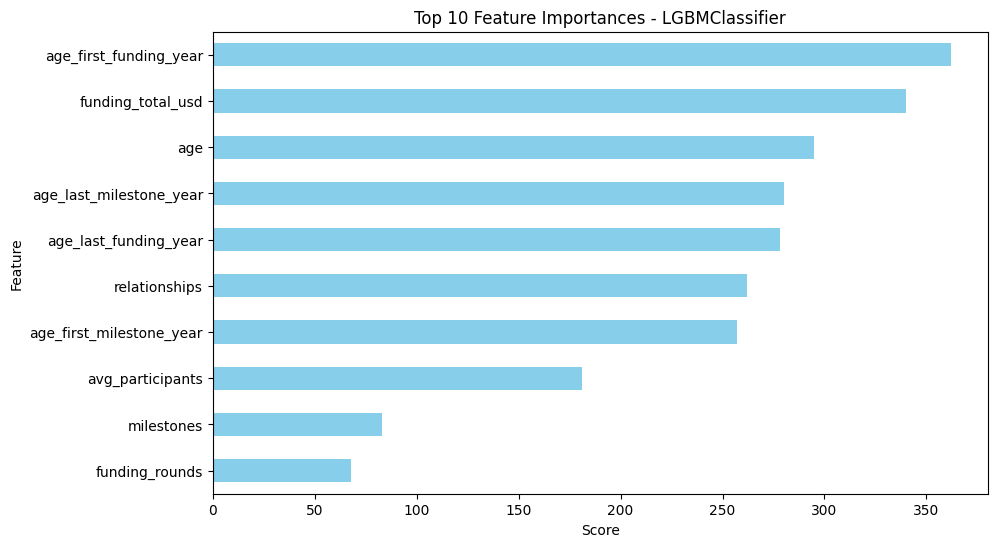

In [63]:
# Get feature importances from the trained LGBMClassifier
feat_importances_lgbm = pd.Series(lgbm.feature_importances_, index=X.columns)

# Select the top 10 features with the highest importance scores
top_feat_importances_lgbm = feat_importances_lgbm.nlargest(10)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
ax = top_feat_importances_lgbm.plot(kind='barh', color='skyblue')
ax.invert_yaxis()
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - LGBMClassifier')
plt.show()

AdaBoost

Training Accuracy: 0.8849028400597907
Testing Accuracy: 0.8630952380952381

Accuracy Score: 0.8630952380952381


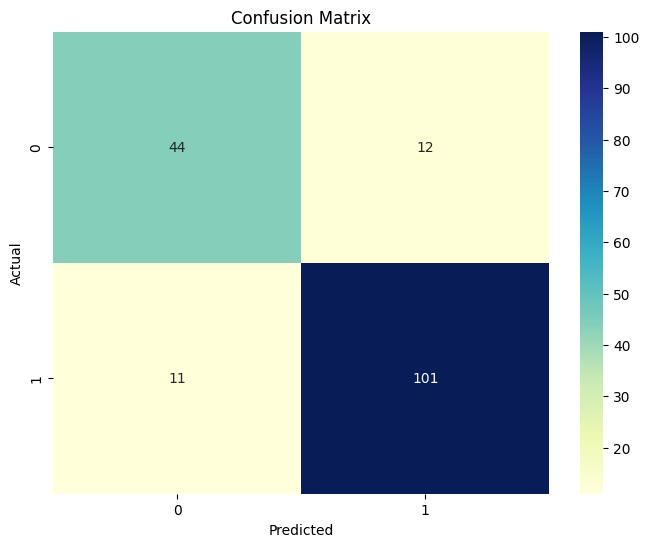

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        56
           1       0.89      0.90      0.90       112

    accuracy                           0.86       168
   macro avg       0.85      0.84      0.85       168
weighted avg       0.86      0.86      0.86       168

------------------------------------------
ROC AUC Score: 0.84375
Precision-Recall AUC Score: 0.9305336072482089


In [64]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the AdaBoostClassifier
adb = AdaBoostClassifier()

# Fit the model on training data
adb.fit(X_train, y_train)

# Predict on test data
y_pred_adb = adb.predict(X_test)

# Print accuracy scores
print("Training Accuracy:", adb.score(X_train, y_train))
print("Testing Accuracy:", adb.score(X_test, y_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred_adb)
print("\nAccuracy Score:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_adb)
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
cr = classification_report(y_test, y_pred_adb)
print("Classification Report:")
print(cr)

print("------------------------------------------")

# Calculate ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_adb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC Score:", roc_auc)

# Calculate Precision-Recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_adb)
f1 = f1_score(y_test, y_pred_adb)
Precision_Recall_auc = auc(recall, precision)
print("Precision-Recall AUC Score:", Precision_Recall_auc)


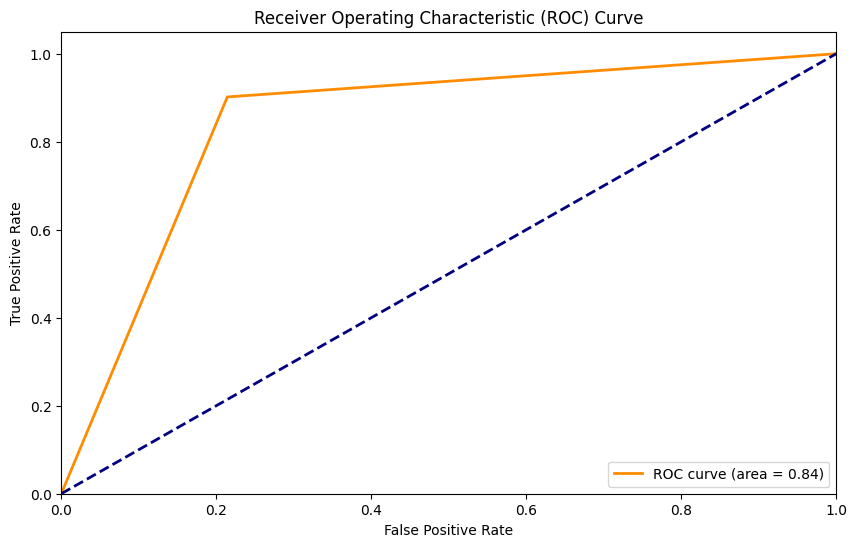

In [65]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

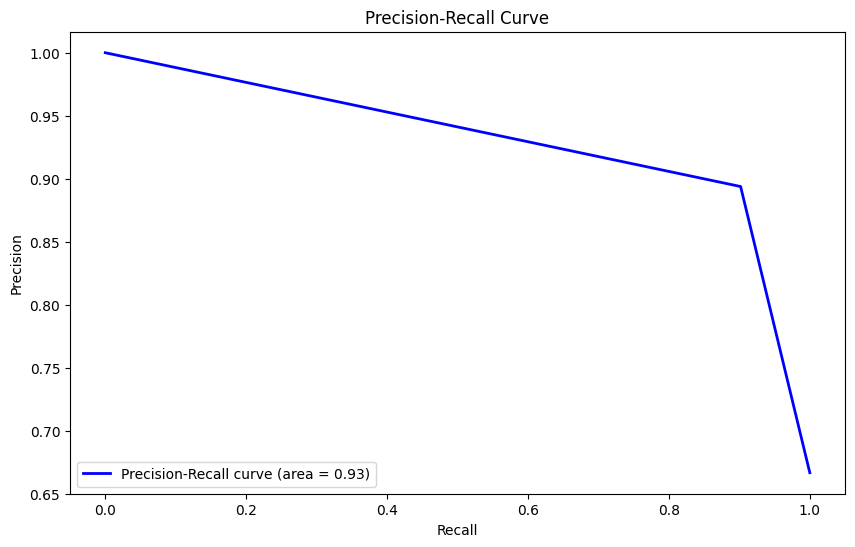

In [66]:
# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {Precision_Recall_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


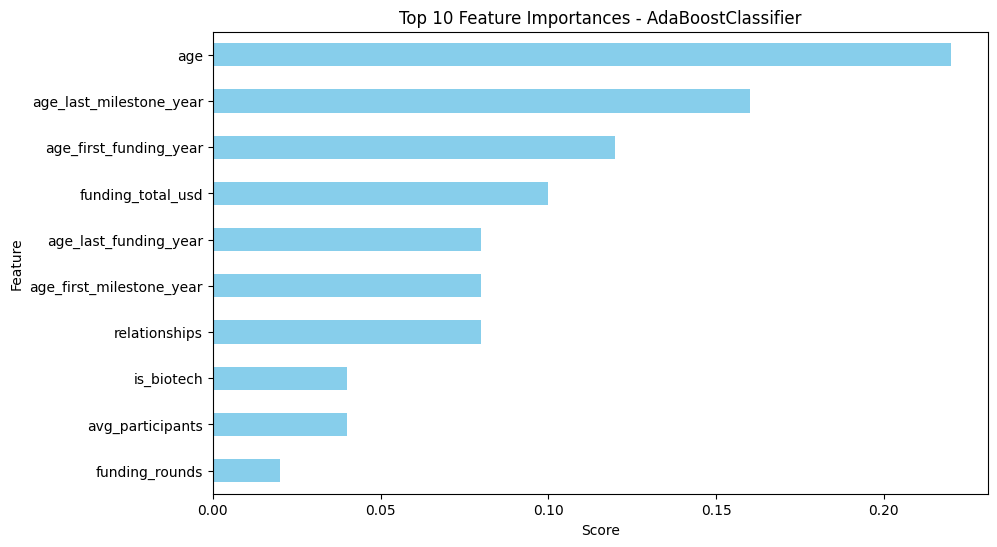

In [67]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize the AdaBoostClassifier with DecisionTreeClassifier as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Decision stump
adb = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the model on training data
adb.fit(X_train, y_train)

# Function to extract feature importances based on feature usage frequency across base estimators
def get_feature_importances(model, features):
    feature_importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
    ], axis=0)
    return pd.Series(feature_importances, index=features)

# Get feature importances
feat_importances_adb = get_feature_importances(adb, X.columns)

# Select the top 10 features with the highest importance scores
top_feat_importances_adb = feat_importances_adb.nlargest(10)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
ax = top_feat_importances_adb.plot(kind='barh', color='skyblue')
ax.invert_yaxis()
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - AdaBoostClassifier')
plt.show()


Decision Tree

Training Accuracy: 1.0
Testing Accuracy: 0.7619047619047619

Accuracy Score: 0.7619047619047619


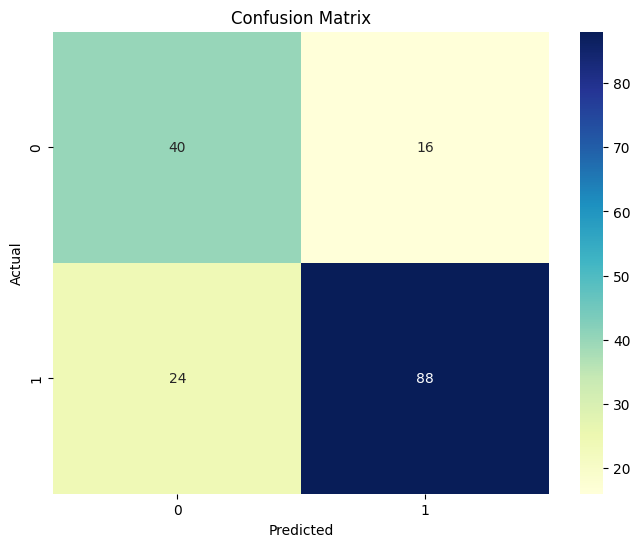

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        56
           1       0.85      0.79      0.81       112

    accuracy                           0.76       168
   macro avg       0.74      0.75      0.74       168
weighted avg       0.77      0.76      0.77       168

------------------------------------------
ROC AUC Score: 0.75
Precision-Recall AUC Score: 0.8873626373626373


In [68]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Print accuracy scores
print("Training Accuracy:", dt.score(X_train, y_train))
print("Testing Accuracy:", dt.score(X_test, y_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred_dt)
print("\nAccuracy Score:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
cr = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(cr)

print("------------------------------------------")

# Calculate ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC Score:", roc_auc)

# Calculate Precision-Recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
Precision_Recall_auc = auc(recall, precision)
print("Precision-Recall AUC Score:", Precision_Recall_auc)

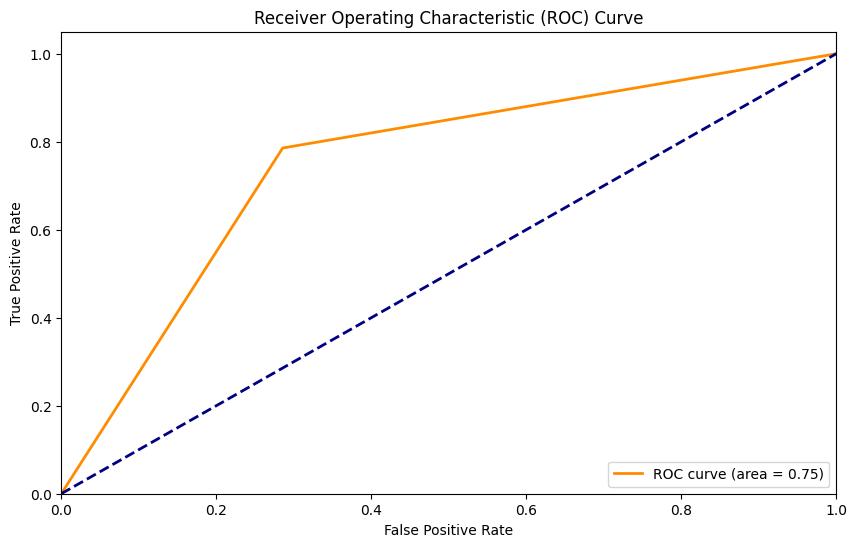

In [69]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

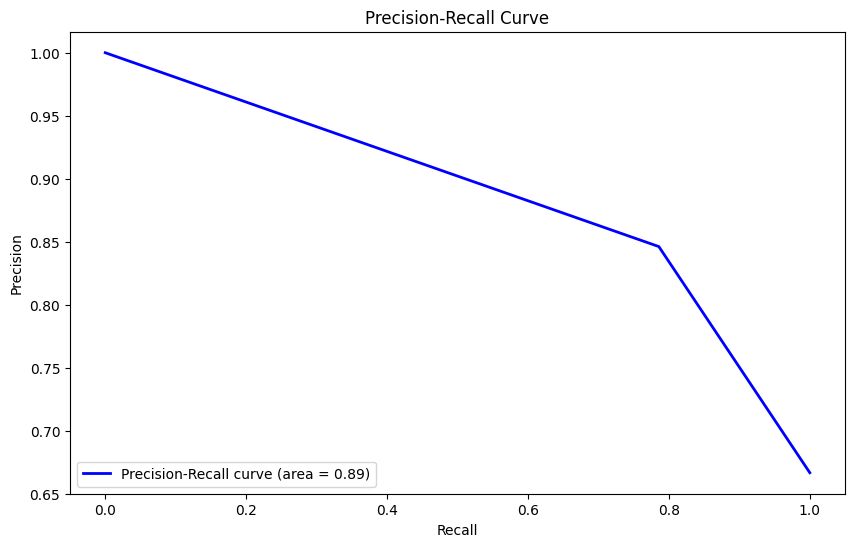

In [70]:
# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {Precision_Recall_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

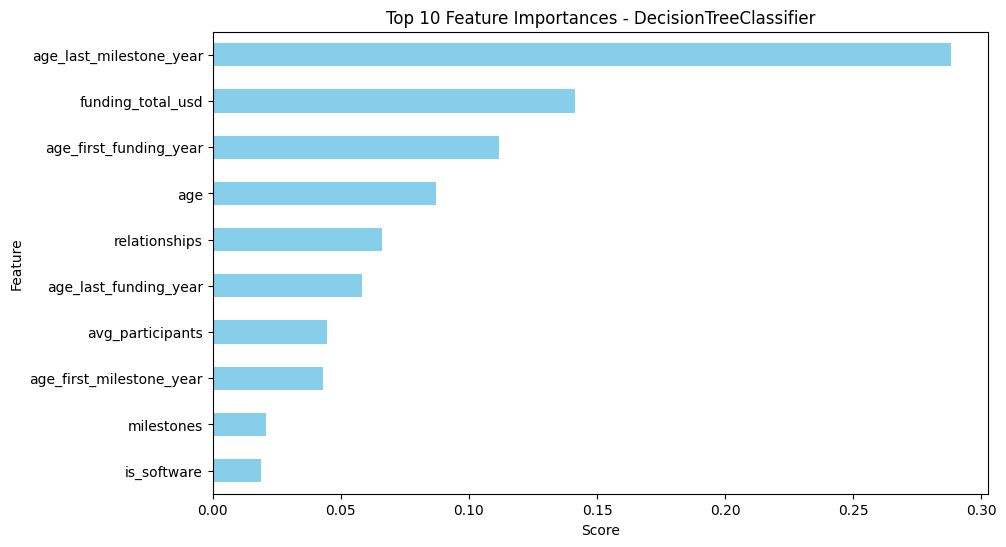

In [71]:
# Get feature importances from the trained DecisionTreeClassifier
feat_importances_dt = pd.Series(dt.feature_importances_, index=X.columns)

# Select the top 10 features with the highest importance scores
top_feat_importances_dt = feat_importances_dt.nlargest(10)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
ax = top_feat_importances_dt.plot(kind='barh', color='skyblue')
ax.invert_yaxis()
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - DecisionTreeClassifier')
plt.show()

Extra Trees Classifier/Regressor

Training Accuracy: 1.0
Testing Accuracy: 0.7916666666666666

Accuracy Score: 0.7916666666666666


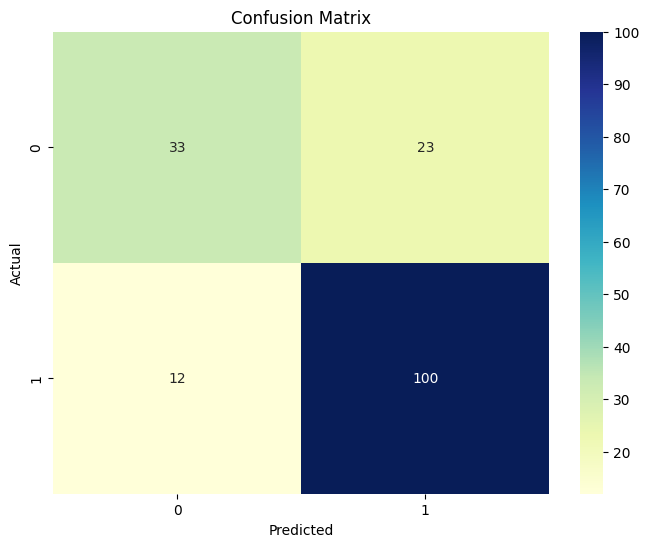

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65        56
           1       0.81      0.89      0.85       112

    accuracy                           0.79       168
   macro avg       0.77      0.74      0.75       168
weighted avg       0.79      0.79      0.79       168

------------------------------------------
ROC AUC Score: 0.7410714285714286
Precision-Recall AUC Score: 0.8886469221835075


In [72]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Initialize the ExtraTreesClassifier
et_clf = ExtraTreesClassifier(random_state=42)

# Fit the model on training data
et_clf.fit(X_train, y_train)

# Predict on test data
y_pred_et_clf = et_clf.predict(X_test)

# Print accuracy scores
print("Training Accuracy:", et_clf.score(X_train, y_train))
print("Testing Accuracy:", et_clf.score(X_test, y_test))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred_et_clf)
print("\nAccuracy Score:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_et_clf)
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
cr = classification_report(y_test, y_pred_et_clf)
print("Classification Report:")
print(cr)

print("------------------------------------------")

# Calculate ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_et_clf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC Score:", roc_auc)

# Calculate Precision-Recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_et_clf)
f1 = f1_score(y_test, y_pred_et_clf)
Precision_Recall_auc = auc(recall, precision)
print("Precision-Recall AUC Score:", Precision_Recall_auc)

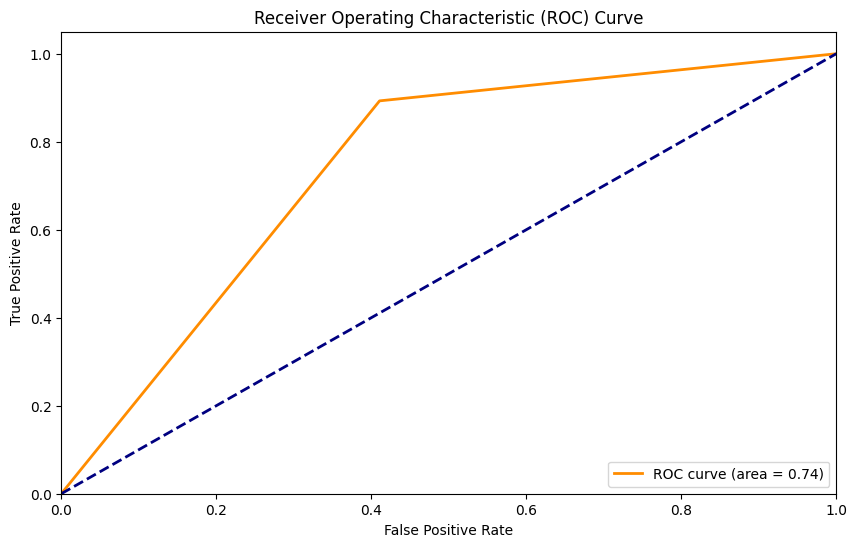

In [73]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

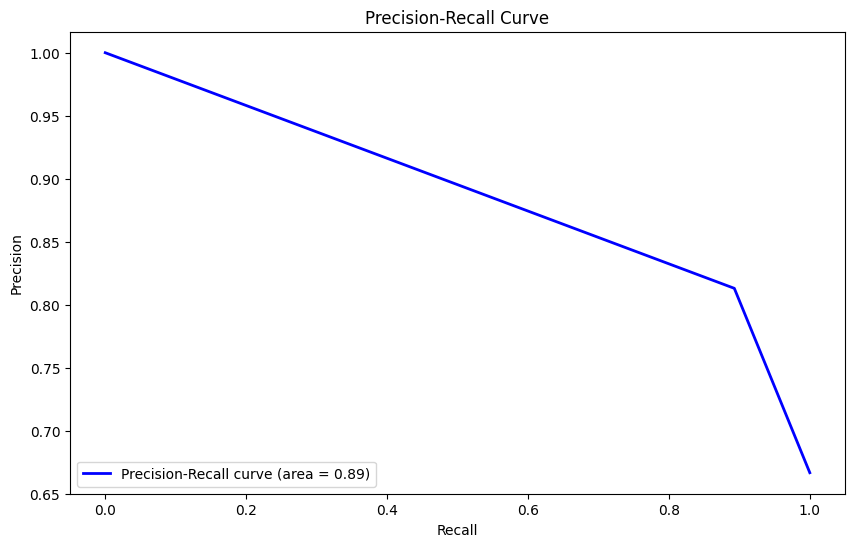

In [74]:
# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {Precision_Recall_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

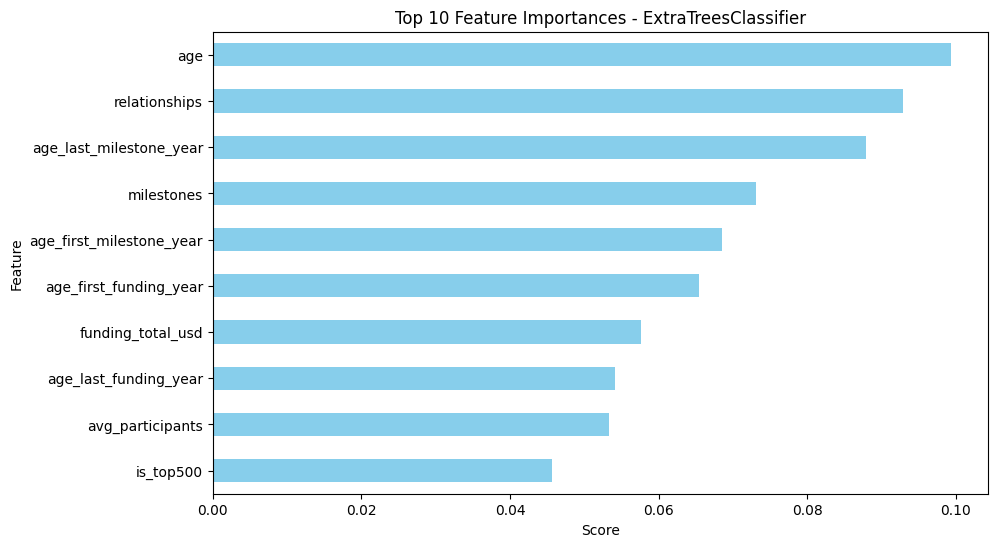

In [75]:
feat_importances_et_clf = pd.Series(et_clf.feature_importances_, index=X.columns)

# Select the top 10 features with the highest importance scores
top_feat_importances_et_clf = feat_importances_et_clf.nlargest(10)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
ax = top_feat_importances_et_clf.plot(kind='barh', color='skyblue')
ax.invert_yaxis()
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - ExtraTreesClassifier')
plt.show()

Summary Result

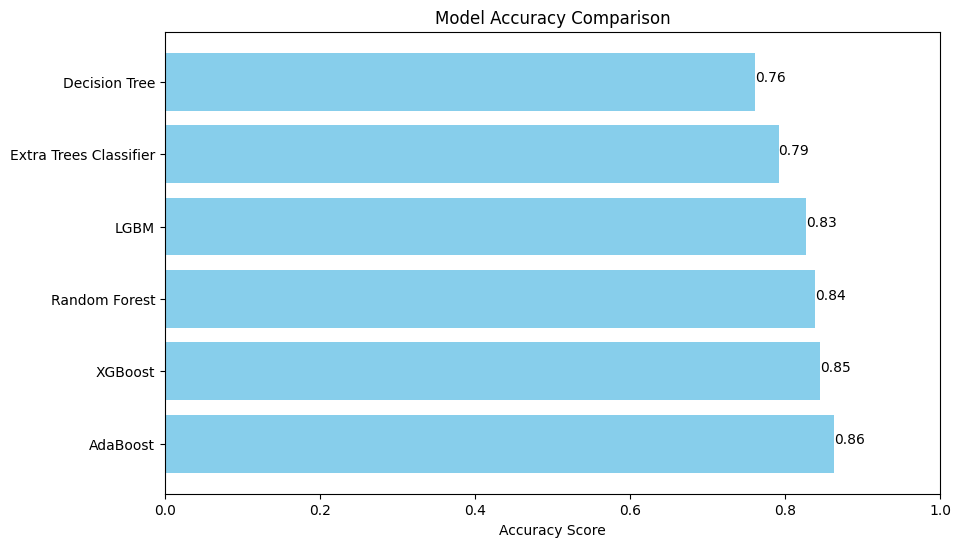

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracy scores
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
accuracy_adb = accuracy_score(y_test, y_pred_adb)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_et_clf = accuracy_score(y_test, y_pred_et_clf)

# Create a list of models and their corresponding accuracy scores
models = ['Random Forest', 'XGBoost', 'LGBM', 'AdaBoost', 'Decision Tree', 'Extra Trees Classifier']
accuracies = [accuracy_rf, accuracy_xgb, accuracy_lgbm, accuracy_adb, accuracy_dt, accuracy_et_clf]

# Sort models by accuracy scores from highest to lowest
sorted_indices = np.argsort(accuracies)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_models, sorted_accuracies, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Accuracy scores range from 0 to 1
for index, value in enumerate(sorted_accuracies):
    plt.text(value, index, f'{value:.2f}')
plt.show()


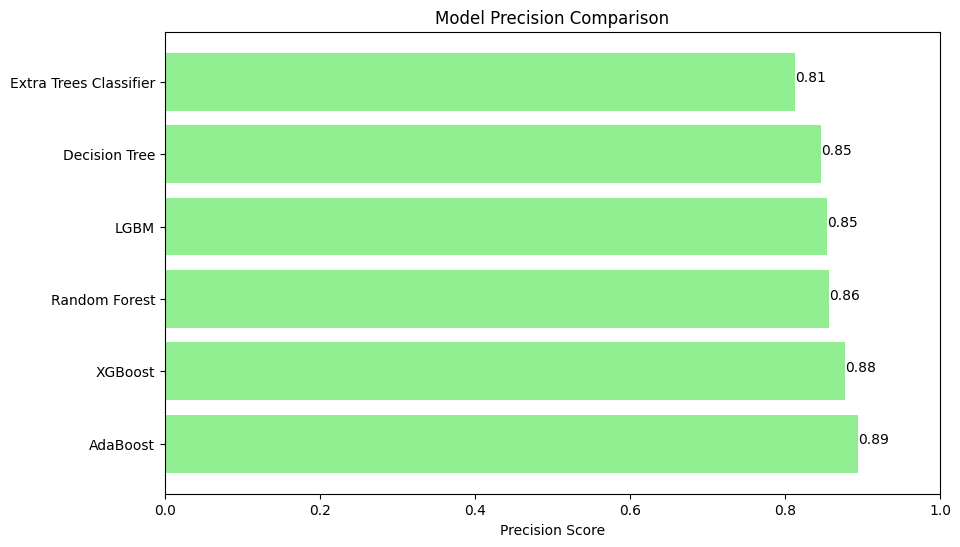

In [78]:
#Precision

from sklearn.metrics import precision_score, recall_score
# Calculate precision scores
precision_rf = precision_score(y_test, y_pred_rf)
precision_xgb = precision_score(y_test, y_pred_xgb)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
precision_adb = precision_score(y_test, y_pred_adb)
precision_dt = precision_score(y_test, y_pred_dt)
precision_et_clf = precision_score(y_test, y_pred_et_clf)

# Create lists of models and their corresponding scores
models = ['Random Forest', 'XGBoost', 'LGBM', 'AdaBoost', 'Decision Tree', 'Extra Trees Classifier']
precisions = [precision_rf, precision_xgb, precision_lgbm, precision_adb, precision_dt, precision_et_clf]

# Sort models by precision scores from highest to lowest
sorted_indices_precision = np.argsort(precisions)[::-1]
sorted_models_precision = [models[i] for i in sorted_indices_precision]
sorted_precisions = [precisions[i] for i in sorted_indices_precision]

# Plot precision bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_models_precision, sorted_precisions, color='lightgreen')
plt.xlabel('Precision Score')
plt.title('Model Precision Comparison')
plt.xlim(0, 1)  # Precision scores range from 0 to 1
for index, value in enumerate(sorted_precisions):
    plt.text(value, index, f'{value:.2f}')
plt.show()


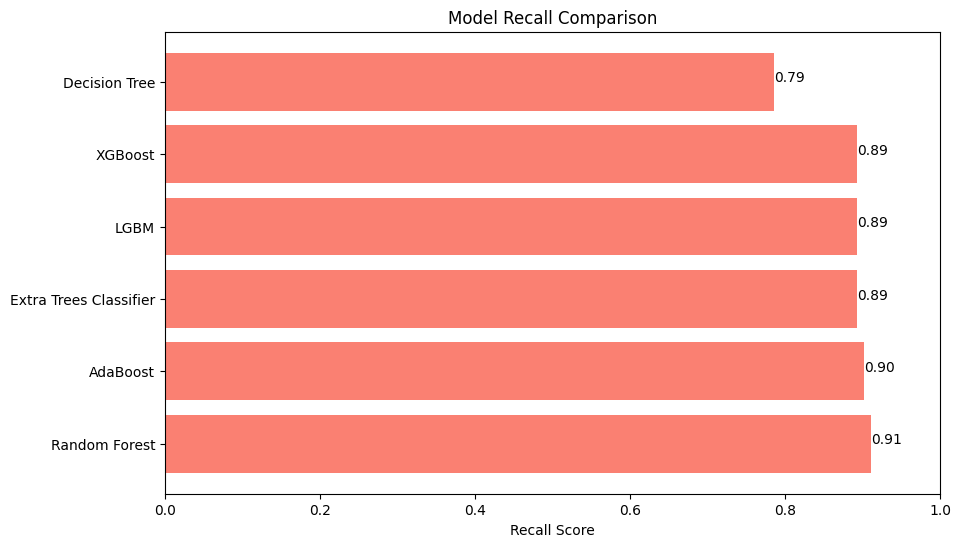

In [79]:
#Recall
# Calculate recall scores
recall_rf = recall_score(y_test, y_pred_rf)
recall_xgb = recall_score(y_test, y_pred_xgb)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
recall_adb = recall_score(y_test, y_pred_adb)
recall_dt = recall_score(y_test, y_pred_dt)
recall_et_clf = recall_score(y_test, y_pred_et_clf)

recalls = [recall_rf, recall_xgb, recall_lgbm, recall_adb, recall_dt, recall_et_clf]

# Sort models by recall scores from highest to lowest
sorted_indices_recall = np.argsort(recalls)[::-1]
sorted_models_recall = [models[i] for i in sorted_indices_recall]
sorted_recalls = [recalls[i] for i in sorted_indices_recall]

# Plot recall bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_models_recall, sorted_recalls, color='salmon')
plt.xlabel('Recall Score')
plt.title('Model Recall Comparison')
plt.xlim(0, 1)  # Recall scores range from 0 to 1
for index, value in enumerate(sorted_recalls):
    plt.text(value, index, f'{value:.2f}')
plt.show()

In [80]:
X.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'age',
       'is_in_BigCity', 'has_Seed', 'is_trend_industry'],
      dtype='object')

Model Chosen = AdaBoost

In [81]:
#Save to pickle

import pickle

# Save the trained model to a file using pickle
model_filename = 'adb_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(adb, file)

In [91]:
pd.set_option('display.max_columns', None)
X_test.sample(1)

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age,is_in_BigCity,has_Seed,is_trend_industry
538,0.326,4.6932,3.2548,4.6932,13,4,25200000,3,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,4.0,1,8,1,0,1


In [85]:
model = pickle.load(open('adb_model.pkl','rb'))
print(model.predict(X_test.sample(5)))

[0 0 1 1 1]


In [93]:
import pickle
import numpy as np

# Function to get user input and convert yes/no to 0/1
def get_user_input():
    user_input = []
    user_input.append(float(input("Enter age_first_funding_year: ")))
    user_input.append(float(input("Enter age_last_funding_year: ")))
    user_input.append(float(input("Enter age_first_milestone_year: ")))
    user_input.append(float(input("Enter age_last_milestone_year: ")))
    user_input.append(int(input("Enter relationships: ")))
    user_input.append(int(input("Enter funding_rounds: ")))
    user_input.append(float(input("Enter funding_total_usd: ")))
    user_input.append(int(input("Enter milestones: ")))
    user_input.append(1 if input("Is it software? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Is it web? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Is it mobile? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Is it enterprise? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Is it advertising? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Is it games/video? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Is it ecommerce? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Is it biotech? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Is it consulting? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Is it other category? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Has VC? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Has angel? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Has round A? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Has round B? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Has round C? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Has round D? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(float(input("Enter avg_participants: ")))
    user_input.append(1 if input("Is top 500? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(int(input("Enter age: ")))
    user_input.append(1 if input("Is in Big City? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Has Seed? (yes/no): ").lower() == 'yes' else 0)
    user_input.append(1 if input("Is trend industry? (yes/no): ").lower() == 'yes' else 0)

    return np.array(user_input).reshape(1, -1)

# Load the saved AdaBoost model from the file
model_filename = 'adb_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_adb = pickle.load(file)

# Function to convert prediction output to 'fail' or 'success'
def convert_prediction(prediction):
    return 'success' if prediction == 1 else 'fail'

# Get user input
user_data = get_user_input()

# Make a prediction using the loaded model
single_prediction = loaded_adb.predict(user_data)

# Convert prediction to 'fail' or 'success'
prediction_label = convert_prediction(single_prediction[0])

# Print the prediction result
print("\nPrediction for the user input data:")
print(f"The predicted outcome is: {prediction_label}")

Enter age_first_funding_year: 2
Enter age_last_funding_year: 5
Enter age_first_milestone_year: 1
Enter age_last_milestone_year: 5
Enter relationships: 12
Enter funding_rounds: 10
Enter funding_total_usd: 1000000
Enter milestones: 9
Is it software? (yes/no): yes
Is it web? (yes/no): yes
Is it mobile? (yes/no): yes
Is it enterprise? (yes/no): no
Is it advertising? (yes/no): no
Is it games/video? (yes/no): no
Is it ecommerce? (yes/no): yes
Is it biotech? (yes/no): no
Is it consulting? (yes/no): no
Is it other category? (yes/no): no
Has VC? (yes/no): yes
Has angel? (yes/no): yes
Has round A? (yes/no): yes
Has round B? (yes/no): yes
Has round C? (yes/no): yes
Has round D? (yes/no): yes
Enter avg_participants: 5
Is top 500? (yes/no): no
Enter age: 8
Is in Big City? (yes/no): yes
Has Seed? (yes/no): yes
Is trend industry? (yes/no): yes

Prediction for the user input data:
The predicted outcome is: success


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y